In [6]:
import numpy as np
import pandas as pd
import cf # module implemeted at repository: https://github.com/daniel-lima-lopez/Collaborative-Filtering-in-Recomender-System
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
# construct a user-rating matrix
def get_Matrix(data, u_ids, m_ids):
    M = np.zeros(shape=(len(u_ids), len(m_ids)), dtype=np.float32)
    for ui in u_ids:
        auxm = data[data['userId']==ui]['movieId'] # movies rated by user ui
        auxm = np.array(auxm)
        auxr = data[data['userId']==ui]['rating'] # rating of movies
        auxr = np.array(auxr)

        auxui = np.where(u_ids==ui)[0][0] # corresponding user index
        for i in range(len(auxm)):
            auxmi = np.where(m_ids==auxm[i])[0][0] # corresponding movie index
            M[auxui, auxmi] = auxr[i]
    return M

def get_mse(M_test, M_pred):
    return np.mean(np.square(M_test-M_pred))

In [3]:
path = 'ml-latest-small'
data = pd.read_csv(f'{path}/ratings.csv')

# save users and movie ids
user_ids = np.unique(data['userId'])
movie_ids = np.unique(data['movieId'])

In [5]:
# 10-fold indices split
kf = KFold(n_splits=5, shuffle=True, random_state=0)

mse = []
for ki in [3,5,7,9,11]:
    print(f'---- K={ki} ----')
    kmse = [] # mse on each experiment with ki value
    for i, (train_index, test_index) in enumerate(kf.split(data)):
        # data split
        data_train = data.loc[train_index]
        data_test = data.loc[test_index]

        # user-rating matrix construction
        M_train = get_Matrix(data_train, user_ids, movie_ids)
        M_test = get_Matrix(data_test, user_ids, movie_ids)

        # algorithm predictions
        test = cf.CollabFilt(k=ki)
        M_pred = test.fit(M_train)
        aux_mse = get_mse(M_test, M_pred)
        kmse.append(aux_mse)

        # information
        print(f" - Fold {i+1}: {aux_mse}")
    mse.append(kmse)
    print(f' - Mean: {np.mean(kmse)}')

---- K=3 ----
 - Fold 1: 0.42803263664245605
 - Fold 2: 0.40819576382637024
 - Fold 3: 0.4054047465324402
 - Fold 4: 0.4270917773246765
 - Fold 5: 0.4078384339809418
 - Mean: 0.41531267762184143
---- K=5 ----
 - Fold 1: 0.6473603248596191
 - Fold 2: 0.6660019159317017
 - Fold 3: 0.6366471648216248
 - Fold 4: 0.6453900337219238
 - Fold 5: 0.6991510987281799
 - Mean: 0.6589100956916809
---- K=7 ----
 - Fold 1: 0.8557385206222534
 - Fold 2: 0.8800792694091797
 - Fold 3: 0.8143712282180786
 - Fold 4: 0.8335736989974976
 - Fold 5: 0.9101455807685852
 - Mean: 0.8587816953659058
---- K=9 ----
 - Fold 1: 1.064068078994751
 - Fold 2: 1.070827841758728
 - Fold 3: 0.9838963747024536
 - Fold 4: 1.0164984464645386
 - Fold 5: 1.087099552154541
 - Mean: 1.0444780588150024
---- K=11 ----
 - Fold 1: 1.2414335012435913
 - Fold 2: 1.27118980884552
 - Fold 3: 1.1496686935424805
 - Fold 4: 1.186538815498352
 - Fold 5: 1.2607873678207397
 - Mean: 1.221923589706421


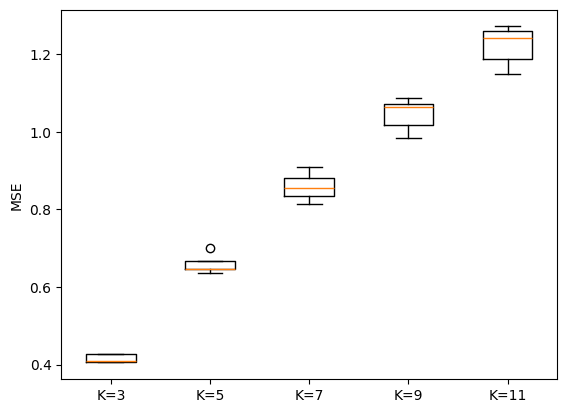

In [7]:
fig, ax = plt.subplots()
ax.set_ylabel('MSE')
ax.boxplot(mse, tick_labels=['K=3', 'K=5', 'K=7', 'K=9', 'K=11'])
fig.savefig(f'imgs/MSE_ks',bbox_inches ="tight",dpi=300)